## Google Cloud & NCAA® ML Competition 2019-Men's
Apply Machine Learning to NCAA® March Madness®

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./mens-machine-learning-competition-2019/Stage2DataFiles/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./mens-machine-learning-competition-2019/Stage2DataFiles/Teams.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/TeamConferences.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/MasseyOrdinals_thru_2019_day_128.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneySeeds.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/SecondaryTourneyTeams.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneySeedRoundSlots.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/RegularSeasonDetailedResults.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/RegularSeasonCompactResults.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/TeamCoaches.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/Cities.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/SecondaryTourneyCompactResults.csv
./mens-machine-learning-competition-2019/Stage2DataFiles/GameCities.csv
./mens-machine-learning-compet

## Importing the libraries

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle


import seaborn as sns
from IPython.display import display

## Loading necessary files into DF

In [3]:
Mteams = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/Teams.csv')
print(Mteams.head())
print(Mteams.shape)

   TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2019
1    1102    Air Force           1985          2019
2    1103        Akron           1985          2019
3    1104      Alabama           1985          2019
4    1105  Alabama A&M           2000          2019
(366, 4)


In [4]:
Mseeds = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneySeeds.csv')
print(Mseeds.head())
print(Mseeds.shape)


   Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374
(2286, 3)


In [5]:
Mseeds = pd.merge(Mseeds, Mteams,on='TeamID')
print(Mseeds.head())
print(Mseeds.shape)


   Season Seed  TeamID    TeamName  FirstD1Season  LastD1Season
0    1985  W01    1207  Georgetown           1985          2019
1    1986  X04    1207  Georgetown           1985          2019
2    1987  X01    1207  Georgetown           1985          2019
3    1988  W08    1207  Georgetown           1985          2019
4    1989  W01    1207  Georgetown           1985          2019
(2286, 6)


In [6]:
# Separating the regions from the Seeds
Mseeds['Region'] = Mseeds['Seed'].apply(lambda x: x[0][:1])
Mseeds['Seed'] = Mseeds['Seed'].apply(lambda x: int(x[1:3]))
print(Mseeds.head())
print(Mseeds.shape)

   Season  Seed  TeamID    TeamName  FirstD1Season  LastD1Season Region
0    1985     1    1207  Georgetown           1985          2019      W
1    1986     4    1207  Georgetown           1985          2019      X
2    1987     1    1207  Georgetown           1985          2019      X
3    1988     8    1207  Georgetown           1985          2019      W
4    1989     1    1207  Georgetown           1985          2019      W
(2286, 7)


In [7]:
rg_season_compact_results = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/RegularSeasonCompactResults.csv')
print(rg_season_compact_results.tail())
print(rg_season_compact_results.shape)

        Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
161547    2019     132     1153      69     1222      57    N      0
161548    2019     132     1209      73     1426      64    N      0
161549    2019     132     1277      65     1276      60    N      0
161550    2019     132     1387      55     1382      53    N      0
161551    2019     132     1463      97     1217      85    H      0
(161552, 8)


In [8]:
df_reg_season_detailed = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/RegularSeasonDetailedResults.csv')
print(df_reg_season_detailed.tail())
print(df_reg_season_detailed.shape)

       Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  \
87499    2019     132     1153      69     1222      57    N      0    22   
87500    2019     132     1209      73     1426      64    N      0    20   
87501    2019     132     1277      65     1276      60    N      0    22   
87502    2019     132     1387      55     1382      53    N      0    22   
87503    2019     132     1463      97     1217      85    H      0    32   

       WFGA  ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
87499    50  ...     33    11    18   17   16     8    7     2     4   19  
87500    50  ...     33    11    17   13   28    12   14     5     2   24  
87501    55  ...     25    10    12    3   26    17    6     5     5   11  
87502    59  ...     19     8    10   13   30     9   11     2     7   16  
87503    53  ...     32    19    24   12   15     7    9     1     2   22  

[5 rows x 34 columns]
(87504, 34)


In [9]:
tourney_compact_results = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneyCompactResults.csv')
print(tourney_compact_results .head())
print(tourney_compact_results.shape)

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0
(2184, 8)


In [10]:
tourney_detailed_results = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneyDetailedResults.csv')
print(tourney_detailed_results.head())
print(tourney_detailed_results.shape)

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003     134     1421      92     1411      84    N      1    32    69   
1    2003     136     1112      80     1436      51    N      0    31    66   
2    2003     136     1113      84     1272      71    N      0    31    59   
3    2003     136     1141      79     1166      73    N      0    29    53   
4    2003     136     1143      76     1301      74    N      1    27    64   

   ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0  ...     31    14    31   17   28    16   15     5     0   22  
1  ...     16     7     7    8   26    12   17    10     3   15  
2  ...     28    14    21   20   22    11   12     2     5   18  
3  ...     17    12    17   14   17    20   21     6     6   21  
4  ...     21    15    20   10   26    16   14     5     8   19  

[5 rows x 34 columns]
(1048, 34)


## Feature Engineering 1

In [11]:
games_stats = []

for row in tourney_detailed_results.to_dict('records'):
    game = {}
    game['Won'] = 1
    game['Season'] =  row['Season']
    game['DayNum'] = row['DayNum']
    game['TeamID'] = row['WTeamID']
    game['OpponentID'] = row['LTeamID']
    game['FGM'] = row['WFGM']
    game['Loc'] = row['WLoc']
    game['Score'] = row['WScore']
    game['FGA'] = row['WFGA']
    game['FGM3'] = row['WFGM3']
    game['FGA3'] = row['WFGA3']
    game['FTM'] = row['WFTM']
    game['FTA'] = row['WFTA']
    game['OR'] = row['WOR']
    game['DR'] = row['WDR']
    game['AST'] = row['WAst']
    game['TO'] = row['WTO']
    game['STL'] = row['WStl']
    game['BLK'] = row['WBlk']
    game['PF'] = row['WPF']
    games_stats.append(game)
    game = {}
    game['Won']= 0
    game['Season'] = row['Season']
    game['DayNum'] = row['DayNum']
    game['TeamID'] = row['LTeamID']
    game['OpponentID'] = row['WTeamID']
    game['FGM'] = row['LFGM']
    game['Loc'] = row['WLoc']
    game['Score'] = row['LScore']
    game['FGA'] = row['LFGA']
    game['FGM3'] = row['LFGM3']
    game['FGA3'] = row['LFGA3']
    game['FTM'] = row['LFTM']
    game['FTA'] = row['LFTA']
    game['OR'] = row['LOR']
    game['DR'] = row['LDR']
    game['AST'] = row['LAst']
    game['TO'] = row['LTO']
    game['STL'] = row['LStl']
    game['BLK'] = row['LBlk']
    game['PF'] = row['LPF']
    games_stats.append(game)

In [12]:
# Separating winners and losers using Won Column which is set to 1 for winner and 0 for loser

tournament = pd.DataFrame(games_stats)
print(tournament.head())
print(tournament.shape)

   Won  Season  DayNum  TeamID  OpponentID  FGM Loc  Score  FGA  FGM3  FGA3  \
0    1    2003     134    1421        1411   32   N     92   69    11    29   
1    0    2003     134    1411        1421   29   N     84   67    12    31   
2    1    2003     136    1112        1436   31   N     80   66     7    23   
3    0    2003     136    1436        1112   20   N     51   64     4    16   
4    1    2003     136    1113        1272   31   N     84   59     6    14   

   FTM  FTA  OR  DR  AST  TO  STL  BLK  PF  
0   17   26  14  30   17  12    5    3  22  
1   14   31  17  28   16  15    5    0  22  
2   11   14  11  36   22  16   10    7   8  
3    7    7   8  26   12  17   10    3  15  
4   16   22  10  27   18   9    7    4  19  
(2096, 20)


In [13]:
tournament_df = pd.merge(tournament , Mseeds, on= ['Season','TeamID'])
tournament_df.rename(columns={'Seed': 'Team_Seed'}, inplace=True)
tournament_df.head()

,Won,Season,DayNum,TeamID,OpponentID,FGM,Loc,Score,FGA,FGM3,...,AST,TO,STL,BLK,PF,Team_Seed,TeamName,FirstD1Season,LastD1Season,Region
0,1,2003,134,1421,1411,32,N,92,69,11,...,17,12,5,3,22,16,UNC Asheville,1987,2019,X
1,0,2003,137,1421,1400,23,N,61,62,5,...,5,11,9,3,16,16,UNC Asheville,1987,2019,X
2,0,2003,134,1411,1421,29,N,84,67,12,...,16,15,5,0,22,16,TX Southern,1985,2019,X
3,1,2003,136,1112,1436,31,N,80,66,7,...,22,16,10,7,8,1,Arizona,1985,2019,Z
4,1,2003,138,1112,1211,34,N,96,74,7,...,18,9,7,4,20,1,Arizona,1985,2019,Z


In [14]:
tournament_df2 = pd.merge(tournament_df , Mseeds.rename(columns={'TeamID':'OpponentID'}), on= ['Season','OpponentID'])
tournament_df2 .rename(columns={'Seed': 'OpponentSeed',
                                'TeamName_x':'Team',
                                'TeamName_y':'Opponents',
                                 'Region_x':'Team_Region',
                                 'Region_y':'Opponent_Region'}, inplace=True)
tournament_df2 .head()

,Won,Season,DayNum,TeamID,OpponentID,FGM,Loc,Score,FGA,FGM3,...,Team_Seed,Team,FirstD1Season_x,LastD1Season_x,Team_Region,OpponentSeed,Opponents,FirstD1Season_y,LastD1Season_y,Opponent_Region
0,1,2003,134,1421,1411,32,N,92,69,11,...,16,UNC Asheville,1987,2019,X,16,TX Southern,1985,2019,X
1,0,2003,137,1421,1400,23,N,61,62,5,...,16,UNC Asheville,1987,2019,X,1,Texas,1985,2019,X
2,0,2003,144,1163,1400,30,N,78,71,4,...,5,Connecticut,1985,2019,X,1,Texas,1985,2019,X
3,0,2003,146,1277,1400,25,N,76,54,8,...,7,Michigan St,1985,2019,X,1,Texas,1985,2019,X
4,0,2003,139,1345,1400,23,N,67,62,5,...,9,Purdue,1985,2019,X,1,Texas,1985,2019,X


In [15]:
tournament_df2['SeedDiff'] = tournament_df2.Team_Seed - tournament_df2.OpponentSeed
tournament_df2.head()

,Won,Season,DayNum,TeamID,OpponentID,FGM,Loc,Score,FGA,FGM3,...,Team,FirstD1Season_x,LastD1Season_x,Team_Region,OpponentSeed,Opponents,FirstD1Season_y,LastD1Season_y,Opponent_Region,SeedDiff
0,1,2003,134,1421,1411,32,N,92,69,11,...,UNC Asheville,1987,2019,X,16,TX Southern,1985,2019,X,0
1,0,2003,137,1421,1400,23,N,61,62,5,...,UNC Asheville,1987,2019,X,1,Texas,1985,2019,X,15
2,0,2003,144,1163,1400,30,N,78,71,4,...,Connecticut,1985,2019,X,1,Texas,1985,2019,X,4
3,0,2003,146,1277,1400,25,N,76,54,8,...,Michigan St,1985,2019,X,1,Texas,1985,2019,X,6
4,0,2003,139,1345,1400,23,N,67,62,5,...,Purdue,1985,2019,X,1,Texas,1985,2019,X,8


In [16]:
tournament_df2.tail()

,Won,Season,DayNum,TeamID,OpponentID,FGM,Loc,Score,FGA,FGM3,...,Team,FirstD1Season_x,LastD1Season_x,Team_Region,OpponentSeed,Opponents,FirstD1Season_y,LastD1Season_y,Opponent_Region,SeedDiff
2091,1,2018,139,1401,1314,31,N,86,60,10,...,Texas A&M,1985,2019,Z,2,North Carolina,1985,2019,Z,5
2092,1,2018,137,1345,1168,23,N,74,59,9,...,Purdue,1985,2019,W,15,CS Fullerton,1985,2019,W,-13
2093,1,2018,137,1401,1344,26,N,73,52,6,...,Texas A&M,1985,2019,Z,10,Providence,1985,2019,Z,-3
2094,1,2018,137,1420,1438,26,N,74,48,12,...,UMBC,1987,2019,Y,1,Virginia,1985,2019,Y,15
2095,1,2018,137,1452,1293,32,N,85,62,4,...,West Virginia,1985,2019,W,12,Murray St,1985,2019,W,-7


In [17]:
# Winning_Teams
winning_Teams = tournament_df2[tournament_df2['Won'] == 1]
# Losing_Teams
losing_Teams = tournament_df2[tournament_df2['Won'] == 0]

In [18]:
print(winning_Teams.head().T)
#print(losing_Teams.head().T)

                             0         5              7        8        9
Won                          1         1              1        1        1
Season                    2003      2003           2003     2003     2003
DayNum                     134       152            137      136      138
TeamID                    1421      1393           1400     1112     1112
OpponentID                1411      1400           1421     1436     1211
FGM                         32        32             31       31       34
Loc                          N         N              N        N        N
Score                       92        95             82       80       96
FGA                         69        56             62       66       74
FGM3                        11         7              6        7        7
FGA3                        29        13             16       23       24
FTM                         17        24             14       11       21
FTA                         26        

In [19]:
print(winning_Teams.shape)
print(losing_Teams.shape)

(1048, 31)
(1048, 31)


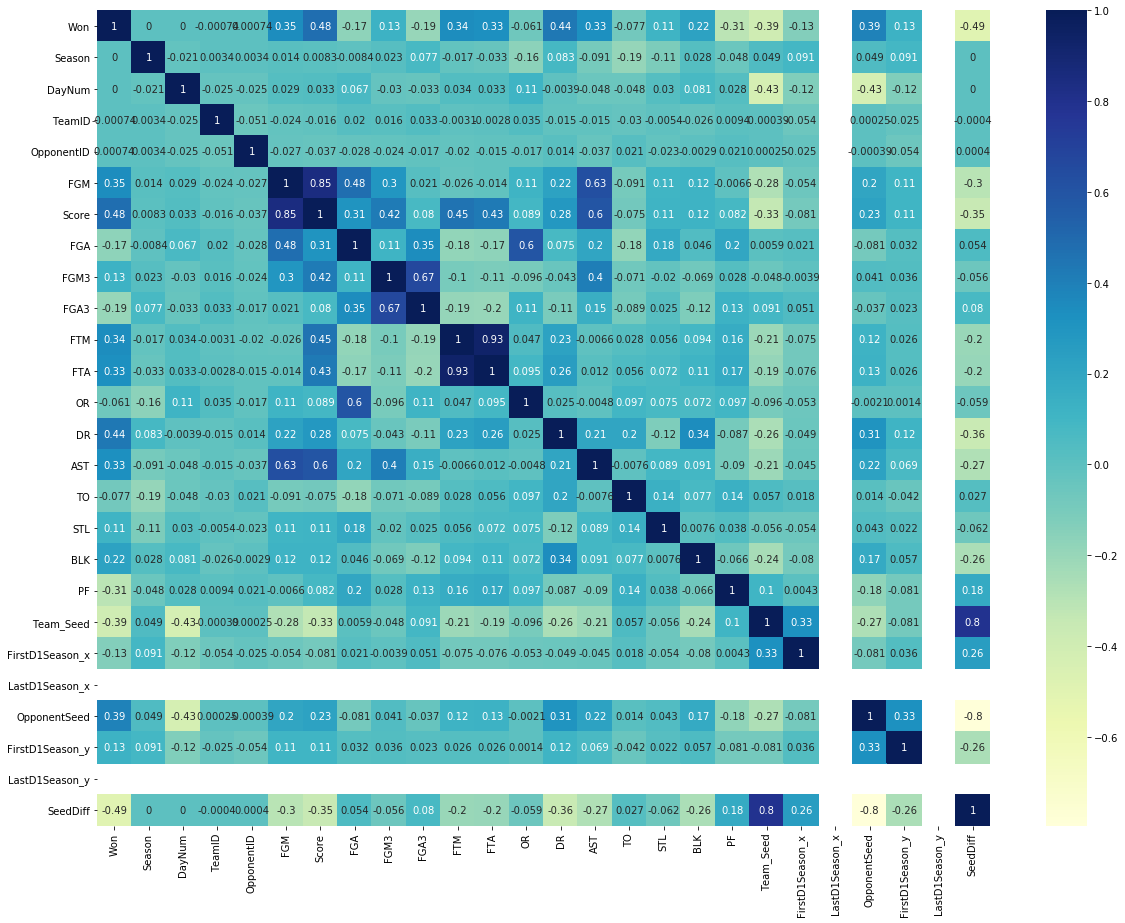

In [20]:
# Features Correlated with Wins
f,ax = plt.subplots(figsize=(20,15))
corr = tournament_df2.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True)

## Feature Engineering 2

In [21]:
yearList = range(2003,2020) #2003 is the first year we have detailed data for
teams_pd = pd.read_csv('./mens-machine-learning-competition-2019/Stage2DataFiles/Teams.csv')
teamIDs = teams_pd['TeamID'].tolist()

rows = list()

for year in yearList:
    for team in teamIDs:
        df_curr_season = df_reg_season_detailed[df_reg_season_detailed.Season == year]       

        df_curr_team_wins = df_curr_season[df_curr_season.WTeamID == team]
        df_curr_team_losses = df_curr_season[df_curr_season.LTeamID == team]
        
        # no games played by them this year.. skip (current team didn't win or lose any games)
        if df_curr_team_wins.shape[0] == 0 and df_curr_team_losses.shape[0] == 0:
            continue;
        
        df_winteam = df_curr_team_wins.rename(columns={
            'WTeamID':'TeamID', 
            'WFGM':'FGM',
            'WFGA':'FGA',
            'WFGM3':'FGM3',
            'WFGA3':'FGA3',
            'WFTM':'FTM',
            'WFTA':'FTA',
            'WOR':'OR',
            'WDR':'DR',
            'WAst':'AST',
            'WTO':'TO',
            'WStl':'STL',
            'WBlk':'BLK',
            'WPF':'PF',
            'WScore':'Score', 
            'LScore':'OppScore'
        
        })
        
        # drop all columns except the ones we are using
        df_winteam = df_winteam[['TeamID', 'FGM', 'FGA', 'FGM3','FGA3','FTM',
                                 'FTA','OR','DR','AST','TO','STL',
                                 'BLK','PF','Score', 'OppScore']]

        df_loseteam = df_curr_team_losses.rename(columns={
            'LTeamID':'TeamID', 
            'LFGM':'FGM',
            'LFGA':'FGA',
            'LFGM3':'FGM3',
            'LFGA3':'FGA3',
            'LFTM':'FTM',
            'LFTA':'FTA',
            'LOR':'OR',
            'LDR':'DR',
            'LAst':'AST',
            'LTO':'TO',
            'LStl':'STL',
            'LBlk':'BLK',
            'LPF':'PF',
            'LScore':'Score',
            'WScore':'OppScore'})
        # drop all columns except the ones we are using
        df_loseteam = df_loseteam[['TeamID', 'FGM', 'FGA', 'FGM3','FGA3','FTM',
                                 'FTA','OR','DR','AST','TO','STL',
                                 'BLK','PF','Score', 'OppScore']] 

        # dataframe w/ all relevant stats from current year for current team
        df_curr_team = pd.concat((df_winteam, df_loseteam)) 

        wins = df_winteam.shape[0]
        
        # Feild Goal Percentage
        FG_Percent = df_curr_team['FGM'].sum() / df_curr_team['FGA'].sum()
        
        # 3 pointer Percentage
        FG3_Percent = df_curr_team['FGM3'].sum() / df_curr_team['FGA3'].sum()
        
        # Free Throw Percentage
        FT_Percent = df_curr_team['FTM'].sum() / df_curr_team['FTA'].sum()
        
        # Average Offensive Rebound 
        OR_Avg = df_curr_team['OR'].sum() / len(df_curr_team['OR'].values)

        # Average Defensive Rebound
        DR_Avg = df_curr_team['DR'].sum() / len(df_curr_team['DR'].values)
        
        # Average Assist
        AST_Avg = df_curr_team['AST'].sum() / len(df_curr_team['AST'].values)
        
        # Turnover Average
        Turnover_Avg = df_curr_team['TO'].sum() / len(df_curr_team['TO'].values)
        
        # Average Steal
        STL_Avg = df_curr_team['STL'].sum() / len(df_curr_team['STL'].values)
 
        # Average Blocks
        BLK_Avg = df_curr_team['BLK'].sum() / len(df_curr_team['BLK'].values)
 
        # Average Personal Foul 
        PF_Avg = df_curr_team['PF'].sum() / len(df_curr_team['PF'].values)
        
        # Average Team Score 
        PPG = df_curr_team['Score'].sum() / len(df_curr_team['Score'].values)
        
        # Average  Opponent Score
        OppPPG = df_curr_team['OppScore'].sum() / len(df_curr_team['OppScore'].values)

        # collect all data in rows list first for effeciency
        rows.append([year, team, wins, FG_Percent,FG3_Percent,FT_Percent,OR_Avg,DR_Avg,
                     AST_Avg,Turnover_Avg,STL_Avg,BLK_Avg,PF_Avg,PPG, OppPPG])

df_training_data = pd.DataFrame(rows, columns=['Season', 'TeamID', 'Wins', 'FG_Percent',
                                               'FG3_Percent','FT_Percent',
                                               'OR_Avg','DR_Avg','AST_Avg',
                                               'TO_Avg','STL_Avg','BLK_Avg',
                                               'PF_Avg','PPG', 'OppPPG'])
df_training_data.tail()

,Season,TeamID,Wins,FG_Percent,FG3_Percent,FT_Percent,OR_Avg,DR_Avg,AST_Avg,TO_Avg,STL_Avg,BLK_Avg,PF_Avg,PPG,OppPPG
5829,2019,1462,18,0.467716,0.332853,0.685855,10.424242,25.757576,14.787879,13.454545,5.424242,3.787879,15.757576,71.878788,70.606061
5830,2019,1463,21,0.496138,0.373928,0.733463,8.678571,29.821429,17.000000,13.250000,5.750000,4.321429,17.000000,80.892857,73.714286
5831,2019,1464,10,0.421687,0.341667,0.696833,12.966667,24.000000,13.633333,13.133333,6.100000,3.400000,20.766667,73.500000,79.233333
5832,2019,1465,12,0.441042,0.349085,0.768763,10.076923,26.269231,10.615385,12.500000,4.346154,2.615385,21.307692,75.461538,75.192308
5833,2019,1466,7,0.384393,0.297450,0.681051,10.862069,25.103448,10.172414,13.655172,6.275862,2.137931,18.965517,65.620690,74.931034


In [22]:
tourney_compact_results.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
tourney_compact_results.head()

,Season,WTeamID,LTeamID
0,1985,1116,1234
1,1985,1120,1345
2,1985,1207,1250
3,1985,1229,1425
4,1985,1242,1325


In [23]:
Mseeds.drop(labels=['TeamName', 'FirstD1Season', 'LastD1Season', 'Region'], inplace=True, axis=1)
Mseeds.tail()

,Season,Seed,TeamID
2281,2017,15,1297
2282,2019,14,1297
2283,2018,15,1252
2284,2019,15,1101
2285,2019,16,1205


In [24]:
df_winseeds = Mseeds.rename(columns={'TeamID':'WTeamID', 'Seed':'WSeed'})
df_lossseeds = Mseeds.rename(columns={'TeamID':'LTeamID', 'Seed':'LSeed'})
df_dummy = pd.merge(left=tourney_compact_results, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'LTeamID'])
df_concat['SeedDiff'] = df_concat.WSeed - df_concat.LSeed
df_concat.head()

,Season,WTeamID,LTeamID,WSeed,LSeed,SeedDiff
0,1985,1116,1234,9,8,1
1,1985,1120,1345,11,6,5
2,1985,1207,1250,1,16,-15
3,1985,1229,1425,9,8,1
4,1985,1242,1325,3,14,-11


In [25]:
df_winstats = df_training_data.rename(columns={
                'TeamID':'WTeamID', 
                'FG_Percent':'WFG_Percent',
                'FG3_Percent':'WFG3_Percent',
                'FT_Percent':'WFT_Percent',
                'OR_Avg':'WOR_Avg',
                'DR_Avg':'WDR_Avg',
                'AST_Avg':'WAST_Avg',
                'TO_Avg':'WTO_Avg',
                'STL_Avg':'WSTL_Avg',
                'BLK_Avg':'WBLK_Avg',
                'PF_Avg':'WPF_Avg', 
                'PPG':'WPPG', 
                'OppPPG':'WOppPPG',
                'Wins':'WWins'})
df_lossstats = df_training_data.rename(columns={
                'TeamID':'LTeamID', 
                'FG_Percent':'LFG_Percent',
                'FG3_Percent':'LFG3_Percent',
                'FT_Percent':'LFT_Percent',
                'OR_Avg':'LOR_Avg',
                'DR_Avg':'LDR_Avg',
                'AST_Avg':'LAST_Avg',
                'TO_Avg':'LTO_Avg',
                'STL_Avg':'LSTL_Avg',
                'BLK_Avg':'LBLK_Avg',
                'PF_Avg':'LPF_Avg', 
                'PPG':'LPPG', 
                'OppPPG':'LOppPPG',
                'Wins':'LWins'})

df_dummy = pd.merge(left=df_concat, right=df_winstats, on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_lossstats, on=['Season', 'LTeamID'])

df_concat['FGPercentDiff'] = df_concat.WFG_Percent - df_concat.LFG_Percent
df_concat['FG3PercentDiff'] = df_concat.WFG3_Percent - df_concat.LFG3_Percent
df_concat['FTPercentDiff'] = df_concat.WFT_Percent - df_concat.LFT_Percent

df_concat['ORAvgDiff'] = df_concat.WOR_Avg - df_concat.LOR_Avg
df_concat['DRAvgDiff'] = df_concat.WDR_Avg - df_concat.LDR_Avg
df_concat['ASTAvgDiff'] = df_concat.WAST_Avg - df_concat.LAST_Avg
df_concat['TOAvgDiff'] = df_concat.WTO_Avg - df_concat.LTO_Avg
df_concat['STLAvgDiff'] = df_concat.WSTL_Avg - df_concat.LSTL_Avg
df_concat['BLKAvgDiff'] = df_concat.WBLK_Avg - df_concat.LBLK_Avg
df_concat['PFAvgDiff'] = df_concat.WPF_Avg - df_concat.LPF_Avg

df_concat['PPGDiff'] = df_concat.WPPG - df_concat.LPPG

df_concat['OppPPGDiff'] = df_concat.WOppPPG - df_concat.LOppPPG

df_concat['WWinMargin'] = df_concat.WPPG - df_concat.WOppPPG

df_concat['LWinMargin'] = df_concat.LPPG - df_concat.LOppPPG

# Created new column named Win margin Differnce out of Winining team Score
# and lossing team score.
df_concat['WinMarginDiff'] = df_concat.WWinMargin - df_concat.LWinMargin

df_concat['WinDiff'] = df_concat.WWins - df_concat.LWins

 # drop all columns except the ones we are using
df_concat = df_concat[['Season', 'WTeamID', 'LTeamID', 'SeedDiff', 
                       'FGPercentDiff', 'FG3PercentDiff','FTPercentDiff',
                       'ORAvgDiff','DRAvgDiff','ASTAvgDiff',
                       'TOAvgDiff', 'STLAvgDiff','BLKAvgDiff','PFAvgDiff',
                       'PPGDiff', 'OppPPGDiff', 'WinMarginDiff', 'WinDiff']]

# Note: We can have SeedDiff == 0 due to the First Four (68 teams)! Also Final Four onwards!
# Note: Pandas merges tossed out data from before 2003!
df_concat.head()

,Season,WTeamID,LTeamID,SeedDiff,FGPercentDiff,FG3PercentDiff,FTPercentDiff,ORAvgDiff,DRAvgDiff,ASTAvgDiff,TOAvgDiff,STLAvgDiff,BLKAvgDiff,PFAvgDiff,PPGDiff,OppPPGDiff,WinMarginDiff,WinDiff
0,2003,1421,1411,0,-0.018262,0.039433,0.142815,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448,-1.593103,7.614943,-9.208046,-5
1,2003,1112,1436,-15,0.016969,0.009777,0.043580,2.213054,1.918719,3.435961,0.716749,1.602217,1.248768,1.853448,17.421182,7.112069,10.309113,6
2,2003,1112,1211,-8,-0.008628,-0.025101,-0.019776,3.243088,2.320276,1.900922,0.237327,1.657834,0.698157,-0.895161,8.149770,2.056452,6.093318,2
3,2003,1112,1323,-4,0.012716,-0.030207,-0.058458,3.791475,0.771889,0.739631,2.011521,1.012673,-1.430876,1.524194,5.117512,-0.943548,6.061060,3
4,2003,1113,1272,3,0.040251,-0.030989,0.016122,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172,1.448276,3.344828,-1.896552,-5


In [26]:
df_concat.shape

(1048, 18)

In [27]:
# We create positive and negative versions of the data so the 
# supervised learning algorithm has sample data of each class to classify

df_wins = pd.DataFrame()
df_wins['SeedDiff'] = df_concat['SeedDiff']

df_wins['FGPercentDiff'] = df_concat['FGPercentDiff']
df_wins['FG3PercentDiff'] = df_concat['FG3PercentDiff']
df_wins['FTPercentDiff'] = df_concat['FTPercentDiff']

df_wins['ORAvgDiff'] = df_concat['ORAvgDiff']
df_wins['DRAvgDiff'] = df_concat['DRAvgDiff']
df_wins['ASTAvgDiff'] = df_concat['ASTAvgDiff']

df_wins['TOAvgDiff'] = df_concat['TOAvgDiff']

df_wins['STLAvgDiff'] = df_concat['STLAvgDiff']
df_wins['BLKAvgDiff'] = df_concat['BLKAvgDiff']
df_wins['PFAvgDiff'] = df_concat['PFAvgDiff']

df_wins['PPGDiff'] = df_concat['PPGDiff']
df_wins['OppPPGDiff'] = df_concat['OppPPGDiff']
df_wins['WinMarginDiff'] = df_concat['WinMarginDiff']
df_wins['WinDiff'] = df_concat['WinDiff']
df_wins['Won'] = 1


df_losses = pd.DataFrame()

df_losses['SeedDiff'] = -df_concat['SeedDiff']

df_losses['FGPercentDiff'] = -df_concat['FGPercentDiff']
df_losses['FG3PercentDiff'] = -df_concat['FG3PercentDiff']
df_losses['FTPercentDiff'] = -df_concat['FTPercentDiff']

df_losses['ORAvgDiff'] = -df_concat['ORAvgDiff']
df_losses['DRAvgDiff'] = -df_concat['DRAvgDiff']
df_losses['ASTAvgDiff'] = -df_concat['ASTAvgDiff']

df_losses['TOAvgDiff'] = -df_concat['TOAvgDiff']

df_losses['STLAvgDiff'] = -df_concat['STLAvgDiff']
df_losses['BLKAvgDiff'] = -df_concat['BLKAvgDiff']
df_losses['PFAvgDiff'] = -df_concat['PFAvgDiff']

df_losses['PPGDiff'] = -df_concat['PPGDiff']
df_losses['OppPPGDiff'] = -df_concat['OppPPGDiff']
df_losses['WinMarginDiff'] = -df_concat['WinMarginDiff']
df_losses['WinDiff'] = -df_concat['WinDiff']
df_losses['Won'] = 0



df_predictions = pd.concat((df_wins, df_losses))
df_predictions.head()

,SeedDiff,FGPercentDiff,FG3PercentDiff,FTPercentDiff,ORAvgDiff,DRAvgDiff,ASTAvgDiff,TOAvgDiff,STLAvgDiff,BLKAvgDiff,PFAvgDiff,PPGDiff,OppPPGDiff,WinMarginDiff,WinDiff,Won
0,0,-0.018262,0.039433,0.142815,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448,-1.593103,7.614943,-9.208046,-5,1
1,-15,0.016969,0.009777,0.043580,2.213054,1.918719,3.435961,0.716749,1.602217,1.248768,1.853448,17.421182,7.112069,10.309113,6,1
2,-8,-0.008628,-0.025101,-0.019776,3.243088,2.320276,1.900922,0.237327,1.657834,0.698157,-0.895161,8.149770,2.056452,6.093318,2,1
3,-4,0.012716,-0.030207,-0.058458,3.791475,0.771889,0.739631,2.011521,1.012673,-1.430876,1.524194,5.117512,-0.943548,6.061060,3,1
4,3,0.040251,-0.030989,0.016122,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172,1.448276,3.344828,-1.896552,-5,1


In [28]:
df_predictions.shape

(2096, 16)

## Training Features Updated Coorelation Matrix.

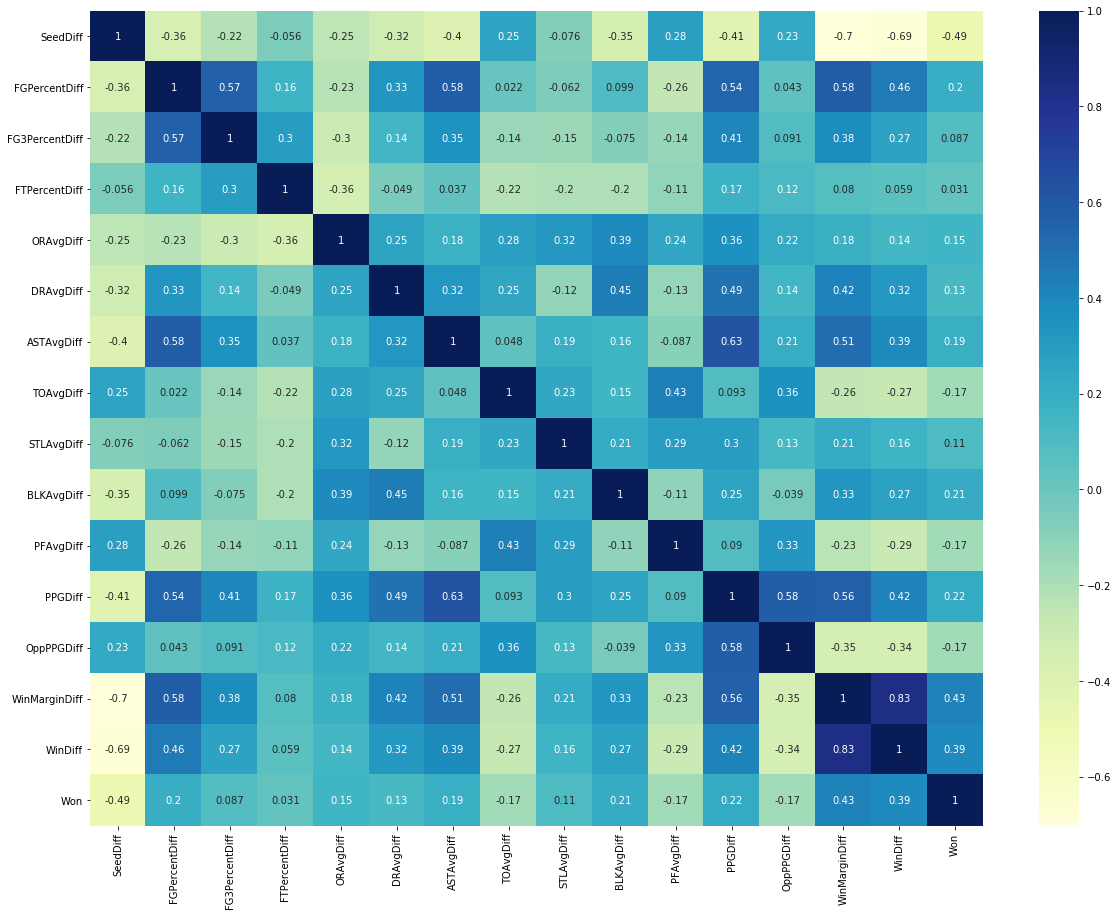

In [29]:
# Features Correlated with Wins
f,ax = plt.subplots(figsize=(20,15))
corr = df_predictions.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True)

In [30]:
# Training Features
X_train = [list(a) for a in zip(
            df_predictions.SeedDiff.values, 
            df_predictions.FGPercentDiff.values,
            df_predictions.FG3PercentDiff.values,
            df_predictions.FTPercentDiff.values,
            df_predictions.ORAvgDiff.values,
            df_predictions.DRAvgDiff.values,
            df_predictions.ASTAvgDiff.values,

            df_predictions.TOAvgDiff.values,
            df_predictions.STLAvgDiff.values,
            df_predictions.BLKAvgDiff.values,
            df_predictions.PFAvgDiff.values,

            df_predictions.PPGDiff.values,
            df_predictions.OppPPGDiff.values,
            df_predictions.WinMarginDiff.values,
            df_predictions.WinDiff.values )]
X_train = np.array(X_train)
y_train = df_predictions.Won.values
X_train, y_train = shuffle(X_train, y_train)


##  K Nearest Neighbors Classifier

In [31]:
knn = KNeighborsClassifier()
k = np.arange(80)+1
parameters = {'n_neighbors': k}
clf = GridSearchCV(knn, parameters, scoring='neg_log_loss')
clf.fit(X_train, y_train)
print('Best log_loss K-Nearest Neighbors Classifier: {}'.format(clf.best_score_))


Best log_loss K-Nearest Neighbors Classifier: -0.5536013597404862


## SVC

In [32]:
SVC = svm.SVC(probability=True)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
tuned_parameters_preselected = [{'kernel': ['linear'], 'C': [10]}]
clf = GridSearchCV(SVC, tuned_parameters_preselected, scoring='neg_log_loss')
clf.fit(X_train, y_train)
print('Best log_loss Support Vector Classification: {}'.format(clf.best_score_))


Best log_loss Support Vector Classification: -0.5435452625863909


## Logistic Regression

In [33]:
# Logistic Regression
logreg = LogisticRegression()
params = {'C': np.logspace(start=-15, stop=15, num=31)} # {C: array[1^-15 , 1^-14, ... 1^15] }
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True) #sklearn model selection
clf.fit(X_train, y_train)
print('Best log_loss Logistic Regression: {}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))
   

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best log_loss Logistic Regression: -0.5425394427885867, with best C: 100.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- Logistic Regression is typically the top-performer. We compute it last, and use this classifier to make future predictions.

- SVC is typically a close second. Comment out Logistic Regression to use  the SVC classifier instead to make future predictions

- Keep in mind, the provided values are a single representation of our classifier's success! Depending on how the data is shuffled, each run of the program may yield a slightly different classifier (and thus different predictions/success rate)


## Why we considered Seed Difference? 
- despite having very low co-relation(-0.49) in the corelation matrix

Text(0, 0.5, 'P(Team1 will win)')

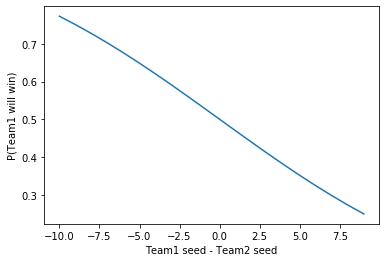

In [34]:
# Create training data with the seeds varying from -10, 10
# All other features are zeroed out so the plot only shows
# the relationship between seed and P(team1 wins)
X1 = np.arange(-10, 10)
X2 = np.zeros(20, dtype=np.int)
X = [list(a) for a in zip(X1, X2, X2, X2, X2, X2, X2, X2, X2, X2, X2, X2, X2, X2, X2)]
X = np.array(X)

preds = clf.predict_proba(X)[:,1]

plt.plot(X1, preds)
plt.xlabel('Team1 seed - Team2 seed')
plt.ylabel('P(Team1 will win)')

> Plotting validates our intuition, that the probability a team will win decreases as the seed differential to its opponent decreases.


In [35]:
df_sample_sub = pd.read_csv('./mens-machine-learning-competition-2019/SampleSubmissionStage2.csv')
df_sample_sub.rename(columns={"Id": "ID", "Pred": "Pred"},inplace = True)

n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

Now we create our X_test matrix with the expected dimensions for the Kaggle contest and fill it with zeroes. Then we loop over the sample submission, and initialize X_test with the correct features for 2019 teams. This X_test matrix is our test set for our previously trained classifier to make predictions about this year's tournament.

In [36]:
X_test = np.zeros(shape=(n_test_games, 15))

for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
# Seed Difference    
    t1_seed = Mseeds[(Mseeds.TeamID == t1) & (Mseeds.Season == year)].Seed.values[0]
    t2_seed = Mseeds[(Mseeds.TeamID == t2) & (Mseeds.Season == year)].Seed.values[0]
    diff_seed = t1_seed - t2_seed
    X_test[ii, 0] = diff_seed

#  Field Goal Percent Difference  
    t1_FGPercent = df_training_data[(df_training_data.TeamID == t1) & 
                                    (df_training_data.Season == year)].FG_Percent.values[0]
    t2_FGPercent = df_training_data[(df_training_data.TeamID == t2) & 
                                    (df_training_data.Season == year)].FG_Percent.values[0]
    diff_FGPercent = t1_FGPercent - t2_FGPercent
    X_test[ii, 1] = diff_FGPercent
    
#  3pointer Percent Difference  
    t1_FG3Percent = df_training_data[(df_training_data.TeamID == t1) & 
                                    (df_training_data.Season == year)].FG3_Percent.values[0]
    t2_FG3Percent = df_training_data[(df_training_data.TeamID == t2) & 
                                    (df_training_data.Season == year)].FG3_Percent.values[0]
    diff_FG3Percent = t1_FG3Percent - t2_FG3Percent
    X_test[ii, 2] = diff_FG3Percent
    
#  Free Throws Percent Difference  
    t1_FTPercent = df_training_data[(df_training_data.TeamID == t1) & 
                                    (df_training_data.Season == year)].FT_Percent.values[0]
    t2_FTPercent = df_training_data[(df_training_data.TeamID == t2) & 
                                    (df_training_data.Season == year)].FT_Percent.values[0]
    diff_FTPercent = t1_FTPercent - t2_FTPercent
    X_test[ii, 3] = diff_FTPercent
    
#   Offensive rebounds committed   
    t1_ORAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].OR_Avg.values[0]
    t2_ORAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].OR_Avg.values[0]
    diff_ORAvg = t1_ORAvg - t2_ORAvg
    X_test[ii, 4] = diff_ORAvg
    
#   Defensive rebounds committed   
    t1_DRAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].DR_Avg.values[0]
    t2_DRAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].DR_Avg.values[0]
    diff_DRAvg = t1_DRAvg - t2_DRAvg
    X_test[ii, 5] = diff_DRAvg
    
#   Assists committed   
    t1_ASTAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].AST_Avg.values[0]
    t2_ASTAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].AST_Avg.values[0]
    diff_ASTAvg = t1_ASTAvg - t2_ASTAvg
    X_test[ii, 6] = diff_ASTAvg
    
#   turnovers committed   
    t1_TOAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].TO_Avg.values[0]
    t2_TOAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].TO_Avg.values[0]
    diff_TOAvg = t1_TOAvg - t2_TOAvg
    X_test[ii, 7] = diff_TOAvg
#   Steals accomplished   
    t1_STLAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].STL_Avg.values[0]
    t2_STLAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].STL_Avg.values[0]
    diff_STLAvg = t1_STLAvg - t2_STLAvg
    X_test[ii, 8] = diff_STLAvg

#   Blocks accomplished   
    t1_BLKAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].BLK_Avg.values[0]
    t2_BLKAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].BLK_Avg.values[0]
    diff_BLKAvg = t1_BLKAvg - t2_BLKAvg
    X_test[ii, 9] = diff_BLKAvg 
    
#   Personal fouls committed accomplished   
    t1_PFAvg = df_training_data[(df_training_data.TeamID == t1) & 
                                (df_training_data.Season == year)].PF_Avg.values[0]
    t2_PFAvg = df_training_data[(df_training_data.TeamID == t2) & 
                                (df_training_data.Season == year)].PF_Avg.values[0]
    diff_PFAvg = t1_PFAvg - t2_PFAvg
    X_test[ii, 10] = diff_PFAvg 
    
#   Teams Average Points per Game     
    t1_PPG = df_training_data[(df_training_data.TeamID == t1) & 
                              (df_training_data.Season == year)].PPG.values[0]
    t2_PPG = df_training_data[(df_training_data.TeamID == t2) & 
                              (df_training_data.Season == year)].PPG.values[0]
    diff_PPG = t1_PPG - t2_PPG
    X_test[ii,11] = diff_PPG
#  Opponents Average Points per Game  
    t1_OppPPG = df_training_data[(df_training_data.TeamID == t1) & 
                                 (df_training_data.Season == year)].OppPPG.values[0]
    t2_OppPPG = df_training_data[(df_training_data.TeamID == t2) & 
                                 (df_training_data.Season == year)].OppPPG.values[0]
    diff_OppPPG = t1_OppPPG - t2_OppPPG
    X_test[ii,12] = diff_OppPPG
#  Win margin    
    X_test[ii, 13] = diff_PPG - diff_OppPPG # Win Margin
#  Wins  differnce     
    t1_Wins = df_training_data[(df_training_data.TeamID == t1) & 
                                 (df_training_data.Season == year)].Wins.values[0]
    t2_Wins = df_training_data[(df_training_data.TeamID == t2) & 
                                 (df_training_data.Season == year)].Wins.values[0]
    X_test[ii, 14] = t1_Wins - t2_Wins

In [37]:
preds = clf.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)
df_sample_sub.Pred = clipped_preds
df_sample_sub.head()

,ID,Pred
0,2019_1101_1113,0.517727
1,2019_1101_1120,0.126357
2,2019_1101_1124,0.336565
3,2019_1101_1125,0.397334
4,2019_1101_1133,0.675102


In [38]:
df_sample_sub.to_csv('finalPrediction2019V1.csv', index=False)

## Log Loss:  0.48538 - Rank: 264 - Top: 33%

In [39]:
from bracketeer import build_bracket
b = build_bracket(
        outputPath='finalBracket2019V1.png',
        teamsPath='./mens-machine-learning-competition-2019/Stage2DataFiles/Teams.csv',
        seedsPath='./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneySeeds.csv',
        submissionPath='finalPrediction2019V1.csv',
        slotsPath='./mens-machine-learning-competition-2019/Stage2DataFiles/NCAATourneySlots.csv',
        year=2019
)

![title](finalBracket2019V1.png)